In [2]:
# importing useful libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
# read the data
advertisment_dataframe = pd.read_csv(r'advertising.csv')

In [4]:
# analyzing the dataframe
advertisment_dataframe.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# analyzing the shape of the dataframe
advertisment_dataframe.shape

(200, 4)

In [6]:
# analyzing the info of the dataframe
advertisment_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


The above information about the dataframe indicates that there are no null values in the dataframe and all are float values present in the dataframe.

In [7]:
# analyzing the summary statistics of the dataframe
advertisment_dataframe.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


From the above describe information we can see that all the numerical variables are normally distributed about the mean.

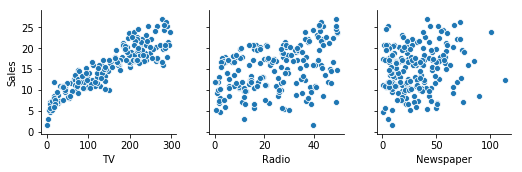

In [9]:
# analyzing the pair plots between the possible pairs of numerical variables present in the dataframe
sns.pairplot(data = advertisment_dataframe, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales')

From the above scatter plots we can see that there exists some linear relationship between Tv and sales. Where as in radio and newspaper when compared to Sales the data points are completely scattered away from each other and the points doesn't represent any specific visible pattern. Let's further confrim whether their exists any linear relationship between TV and sales by computing correlation value betweem the same variables.

In [12]:
# creating a correlation matrix
advertistment_matrix = advertisment_dataframe.corr()
advertistment_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


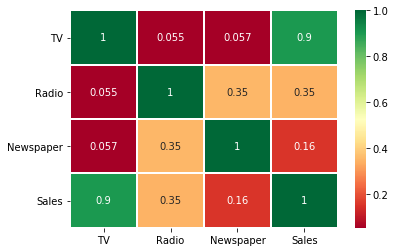

In [16]:
# plotting heatmap using the above correlation matrix
sns.heatmap(advertistment_matrix, annot = True, cmap = 'RdYlGn', linecolor= 'white', linewidths= 1)

From the above heatmap we can observe that there exists very strong positive linear relationship between Tv and sales. Hence we can take froward for building a simple linear regression model to predict Sales when invested some amount of money in advertising usinh Tv as platform.

###### Performoing simple linear regression using Tv and Sales

#### General equation for simple linear regression:
- It is called simple linear regression as it involves only one independent variable.
- y = c + mx
- where y is the dependent variable also called as target variable or output variable
- where x is the independent variable also called as predictor variable
- c refers to intercept, it can be found when x value becomes equal to zero
- m refers to slope of the line which best fits the mode.
- the physical significance of m value is it represents how strongly the independent and         dependent variable are related to each other.
- The purpose of simple linear regression model is to represent the data points of linear       relation in terms of an linear equation which best fits and represents the data points.
- The goodness of the fit of the line can be understood by computing a measure called R         squared, which signifies how much variability in y can be explained by x variable.

#### Steps to perform linear regression model building
- Create X and y variables
- Split the data into training and testing datasets. The possible ratio of split are 70:30 or   80:20.
- Build the model using suitable libraries like statsmodels and sklearn using the tarining       data of X variable and y variable.
- Once model building is done perform summary statistics of the model using statsmodel inorder   to check whether the model is overall significant or not meaning significant or just         luckily happend to be fit.
- Once the verification of siginificance of the variables and overall model is done the next     step is to evaluate the model.
- Evaluation of model involves analysis of residuals and making predictions using testing       data.
- Testing of model can also be done using training data as well. On both data sets it is         better to perform the evaluation of the model.

- As per the problem in hand the X and y variables of the simple linear equation can be         modified.
- Sales = c + m* TV
- m slope is also called as model parameters or model coefficient.

In [17]:
# creating X and y
X = advertisment_dataframe['TV']
y = advertisment_dataframe['Sales']

In [18]:
# analyzing the X variable
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [19]:
# analyzing the y variable
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [20]:
# Creating a split of the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.70, test_size = 0.30, random_state = 100)

In [21]:
# analyzing the training datasets
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [22]:
# analyzing the shape of the X_train dataset
X_train.shape

(140,)

In [23]:
# analyzing the y_train dataset
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#####  Model building using statsmodel
- By default statsmodel doesn't involve the intercept and it will result in the line equation   passing through origin.
- If needed to add constant coefficient it is first required to add the constant and then       build the model using OLS method.
- OLS stands for Ordinary Least Sqaure method which determines to Residual least square sum to   be minimum. Considering RSS to be the cost function of the model and then performing some
  minimization optimization techniques like differentiation or gradient descent method to       compute the optimal values for the coefficents such that RSS value is minimum.
- Once the model parameters are computed upon substituion them in the general simple linear     regression equation it results in model equation.

In [24]:
X_train_sm = sm.add_constant(data = X_train)

In [25]:
# analyzing the X_train after addition of constant
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [26]:
# Building the model using statsmodel
slg_model = sm.OLS(y_train, X_train_sm)
# it results in model object

In [27]:
slg_model

In [29]:
# upon this model we need to fit the line
slg_model = slg_model.fit()

In [30]:
# checking the parameters or coefficients of the model
slg_model.params

const    6.948683
TV       0.054546
dtype: float64

In [31]:
# checking the summary statistics of the model
slg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.52e-52
Time:                        21:41:29   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Few important parameters to be taken into consideration from slg_model.summary()
- The coefficients and the p values associate with the coefficients. As per the hypothesis testing on the significance of the coefficients the p values should be very small less than 0.05 then the coefficients are said to be significant. If they are significant then it can be said that there exists some statistical relation between then independent variable and dependent variable. The important coefficient to be taken into consideration is slope.<br><br>

- In order to check the coefficient significance of predictor variable we need to perform indiviual hypothesis testing and then conclude based on comparsion with p value and significance level. Instead of such latergy process we can take use to Prob(F-stats) value. If the Prob(F-stats) is less than 0.05 then we can say that the overall model is significant. This value is important to be taken into consideration because sometimes there might be case where all the model paramters are significant but the model collectively is insigificant. Such case occurs that the line fitted happened on a chance.<br><br>

- Similary the F-Statistics value needs to be large enough.<br><br>

- R squared value is also an important parameter needs to be taken into consideration as it represents how much percentage or the proportion of the variability in y is explained by x. Smaller values indicated that only small variance of y is explained by x or the line. which means that the line fit is not an best fit line. On the other hand higher the R squared value indicates that most of the variance is explained by x or the line. Which further means that the line is the best fit representation of the scatter plot and also an measure to evaluate the predicted value obtained from the test data. 0 R squared value means that no variance is being explained by the line or the x variable. Which further means that the fitted line is no meaning.

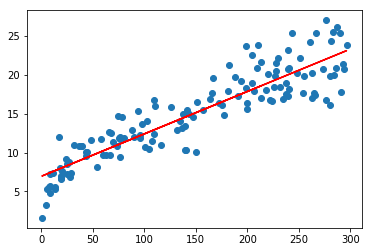

In [33]:
# plotting the line along with scatter plot
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487+0.0545*X_train, 'r')
plt.show()

##### Residual analysis and Evaluation of the model using regression metrics
- Residual analysis is neccessary to check whether all the error terms are normally             distributed around mean zero for every Xi term which involved checking of one of the         assumption. The assumption check of normal distribution of error terms can be done by
  plotting histrogram plot using seaborn or matplotlib libraries.<br><br>
- Next step is to check for the other assumption of independent nature of error terms. This is   can be done by plotting scatter plot between error terms and any of the X and y variables.   If there exists any pattern in distribution then it indicates that the error terms are not   independent of each other. If doesn't exists any visible pattern then it inidicates that     the error terms of independent of each other.<br><br>
- Evalvation of the model meaning checking how good the line has fit for the scatter plot and   also how good in predicting the test values. Evaluation of the model can be done using MSE   (Mean Square Error) which determines mean of the square of the variation between actual y
  terms and predicted y values. Lower the value the better the line fits the model. Higher       MSE value indicates that there are many values away from the line which indirectly means     that the line is not a good fit or best fit for the model.<br><br>
- MSE is an absolute value which changes when any of the units of the predictor variable         changes and also the units are squared in calculating MSE hence we need a relative better
  metric to evaluate the model. We can use R-squared value which is an realtive value and is     the best metric in measuring the goodness of the fit. Also we can compute RMSE value which   is also an absolute value but results in better value than MSE.<br><br>
- R-squared value describes how many variance in y variable is being explained by the line or   the X variable. Higher the R value the better the line fit of the model.<br><br>
- There are some other absolute evaluation metrics for asscessing goodness of fit, such as MAE   and RSE. MAE stands for Mean Absolute Error which computes the mean of residuals and RSE     stands for Residual Square Error, which determines square root of RSS divided by degrees of   freedom. Here df = n-2; where n is number of observations.

In [34]:
# analyzing the X_test and y_test variables
X_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [36]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [37]:
# adding constant to X_test same as X_train
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [48]:
# calculating the y_pred using the model for the test data
y_test_pred = slg_model.predict(X_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [49]:
# calculating the residuals
# these residuals are the error terms
res = y_test - y_pred
res.head()

126   -0.774140
104    0.758518
99     2.876731
92     0.576706
111    1.667608
dtype: float64

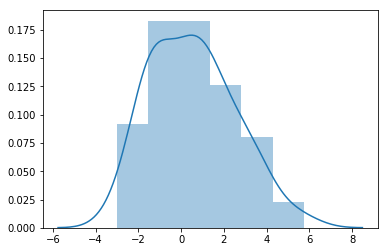

In [50]:
# checking whether these residuals are normally distributed or not
# plotting histogram to check
sns.distplot(res)

From the above plot we can see that the error terms are normally distributed across the mean set to zero. Hence this assumption is satisfied. Now let's check for the other assumptions:

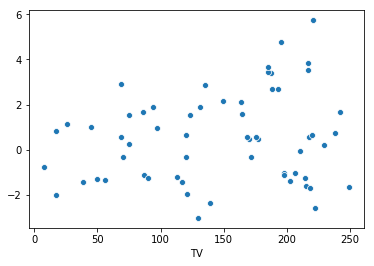

In [51]:
# checking the distribution of residuals with X_test
sns.scatterplot(X_test, res)

From the above plot we can observe that there is no visible pattern available. Hence we can conclude that there is no dependencies between the error terms. Although the residuals for some higher X_test values is higher as there might be some higher residuals in sales whish is not captured by the regression line. But overall you can infer that there doesn't exists any visible pattern.

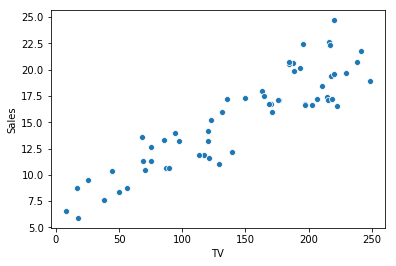

In [52]:
# plotting the scatter plot between X_test and y_test
sns.scatterplot(X_test,y_test)

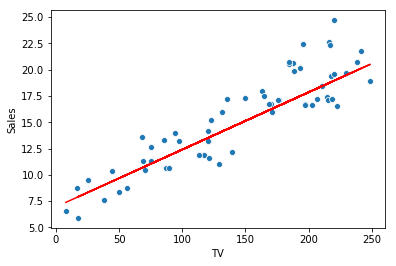

In [53]:
# fitting model equation on top of he scatter plot of the test data
plt.figure()
sns.scatterplot(X_test, y_test)
plt.plot(X_test,6.9487+0.0545*X_test, 'r' )
plt.show()

In [54]:
# evaluation of the test sample using metrics
# importing neccessary libraries for calculation of metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
# calculating mean_squared_error which is an abdolute of error calculation
MSE = mean_squared_error(y_test, y_test_pred)
MSE

4.077556371826956

Evalvation of the line using RMSE is little unpredictable hence we prefer in caluclating R-square value as it is an relative value and also an best metric in determining the goodness of fit.

In [61]:
# calculating RMSE for the test data
rmse_value = np.sqrt(MSE)
rmse_value

2.019296008966233

In [60]:
# calculating the R-squared value for the test data
r2_value_test = r2_score(y_test, y_test_pred)
r2_value_test

0.7921031601245658

In [59]:
# calculating r2_score for the training data.
# although we can obtained using summary statistics but lets just calculate and compare the values
y_train_pred = slg_model.predict(X_train_sm)
y_train_pred.head()
r2_value_train = r2_score(y_train, y_train_pred)
r2_value_train

0.8157933136480389

Upon comparison between the values we can see that the r-squared values are very close to each other it indicates that the model best fits on training and the test data. Hence the model can be used for prediction of new values related to this subject meaning can be able to predict the estimate sales value for an x amount of investment in advertising through TV platform as the model is also significant.

#### Simple Linear Regression model building using sklearn library.
-  Model building using sklearn can be done when needed to know only about the model paramter   and the intercept. 
- Model building using sklearn will not give summary statisctical analysis like statsmodel.     hence we may not be knowing the model is significant or not. we will be just knowing the     parameters.
- Hence model building using sklearn needs to be used when there is an direct requirement of     calculation of the parameters.
- But sklearn is an industry frequent used library. Some companies prefer to know even the       summary statistics and some don't want when the assumptions of the linear regression are     met.

In [62]:
# importing neccesaary library for model building using linear regression
from sklearn.linear_model import LinearRegression

In [65]:
# Create same split of the data using train_test_split() method
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size = 0.30, random_state = 100)

In [66]:
# since we can used the same seed it should be producing the same values of X_train, X_test, y_train and y_test
X_train.head()
print(X_train.shape)

(140,)


In [64]:
# now create a linear model using the above method
slg_another_model = LinearRegression()

-  Now fit the variables into the model: 
- slg_another_model = slg_another_model.fit(X_train, y_train) == when executed will get and     below error: 
- there occurs one error when fitting the variables into the model as the arguments to be       entered.
- into the table should be in the form of an array. Hence convert the X_train and X_test into   array form.

In [70]:
# X_train and X_test are in series, need to convert into arrays.
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)
X_train_array

array([213.4, 151.5, 205. , 142.9, 134.3,  80.2, 239.8,  88.3,  19.4,
       225.8, 136.2,  25.1,  38. , 172.5, 109.8, 240.1, 232.1,  66.1,
       218.4, 234.5,  23.8,  67.8, 296.4, 141.3, 175.1, 220.5,  76.4,
       253.8, 191.1, 287.6, 100.4, 228. , 125.7,  74.7,  57.5, 262.7,
       262.9, 237.4, 227.2, 199.8, 228.3, 290.7, 276.9, 199.8, 239.3,
        73.4, 284.3, 147.3, 224. , 198.9, 276.7,  13.2,  11.7, 280.2,
        39.5, 265.6,  27.5, 280.7,  78.2, 163.3, 213.5, 293.6,  18.7,
        75.5, 166.8,  44.7, 109.8,   8.7, 266.9, 206.9, 149.8,  19.6,
        36.9, 199.1, 265.2, 165.6, 140.3, 230.1,   5.4,  17.9, 237.4,
       286. ,  93.9, 292.9,  25. ,  97.5,  26.8, 281.4,  69.2,  43.1,
       255.4, 239.9, 209.6,   7.3, 240.1, 102.7, 243.2, 137.9,  18.8,
        17.2,  76.4, 139.5, 261.3,  66.9,  48.3, 177. ,  28.6, 180.8,
       222.4, 193.7,  59.6, 131.7,   8.4,  13.1,   4.1,   0.7,  76.3,
       250.9, 273.7,  96.2, 210.8,  53.5,  90.4, 104.6, 283.6,  95.7,
       204.1,  31.5,

In [71]:
# Checking the shape of the arrays
print(X_train_array.shape)
print(X_test_array.shape)

(140,)
(60,)


We need to convert them into two dimensional format hence reshape the array.

In [73]:
# reshaping the array
X_train_array = X_train_array.reshape(140,1)
X_test_array = X_test_array.reshape(60,1)

In [74]:
# now again checking the shape of the arrays after reshaping
print(X_train_array.shape)
print(X_test_array.shape)

(140, 1)
(60, 1)


Now in this format the variables can be inserted as an arguments to fit into model

In [75]:
slg_another_model = slg_another_model.fit(X_train_array, y_train)

In [81]:
# we can check for the parameters like model coefficients and the intercept paramter
print(slg_another_model.coef_[0]) # as the output is in type of array
print(slg_another_model.intercept_)

0.05454575291590796
6.948683200001357


In [84]:
# making predictions using the model
y_test_pred = slg_another_model.predict(X_test_array)
y_train_pred = slg_another_model.predict(X_train_array)

In [86]:
# analyzing the predicted values of the test data set
y_test_pred

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

In [87]:
# analyzing the y_train_pred values
y_train_pred

array([18.58874687, 15.21236477, 18.13056255, 14.74327129, 14.27417782,
       11.32325258, 20.02875475, 11.76507318,  8.00687081, 19.26511421,
       14.37781475,  8.3177816 ,  9.02142181, 16.35782558, 12.93780687,
       20.04511848, 19.60875245, 10.55415747, 18.86147564, 19.73966226,
        8.24687212, 10.64688525, 23.11604436, 14.65599809, 16.49964454,
       18.97602172, 11.11597872, 20.79239529, 17.37237658, 22.63604174,
       12.42507679, 19.38511486, 13.80508434, 11.02325094, 10.08506399,
       21.27785249, 21.28876164, 19.89784494, 19.34147826, 17.84692463,
       19.40147859, 22.80513357, 22.05240218, 17.84692463, 20.00148187,
       10.95234146, 22.45604075, 14.9832726 , 19.16693185, 17.79783345,
       22.04149303,  7.66868714,  7.58686851, 22.23240317,  9.10324044,
       21.43603517,  8.44869141, 22.25967604, 11.21416108, 15.85600465,
       18.59420145, 22.96331626,  7.96868878, 11.06688755, 16.04691479,
        9.38687836, 12.93780687,  7.42323125, 21.50694465, 18.23

In [90]:
# evalvating the model using r2_score
print(r2_score(y_test, y_test_pred))
print(r2_score(y_train, y_train_pred))

0.7921031601245662
0.8157933136480389


From the above we can see that the r2 scores for the test and training data are very much close to each other it indicates that model holds good for both test and the train dataset. Alos these are the same values which are obtained by performing the modle building analysis using statsmodel library.